In [2]:
pip install pandas_datareader

     -------------------------------------- 109.5/109.5 kB 1.3 MB/s eta 0:00:00
     ---------------------------------------- 3.6/3.6 MB 389.6 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [5]:
data = pd.read_csv(r"C:\Users\Asus\OneDrive - IIT Kanpur\Desktop\PG_2007_2017.csv", index_col = 'Date')

log_returns = np.log(1 + data.pct_change())

In [6]:
log_returns.tail()

,PG
Date,
04-04-2017,0.002562
05-04-2017,0.000667
06-04-2017,-0.006356
07-04-2017,-0.001903
10-04-2017,0.002910


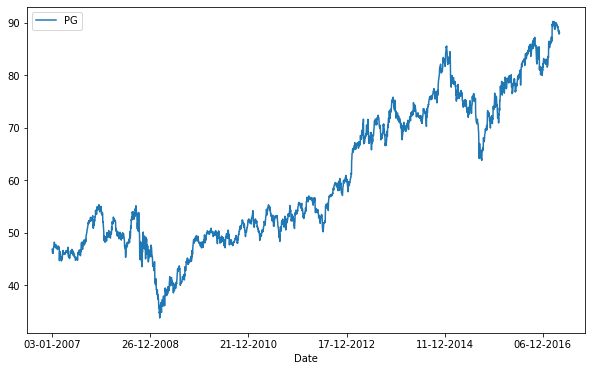

In [7]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

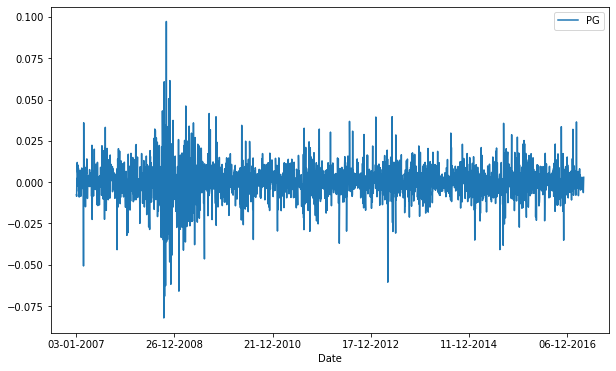

In [8]:
log_returns.plot(figsize = (10, 6))

In [9]:
u = log_returns.mean()
u

PG    0.000244
dtype: float64

In [10]:
var = log_returns.var()
var

PG    0.000124
dtype: float64

In [11]:
drift = u - (0.5 * var)
drift

PG    0.000182
dtype: float64

In [12]:
stdev = log_returns.std()
stdev

PG    0.011138
dtype: float64

******

In [13]:
type(drift)

pandas.core.series.Series

In [14]:
type(stdev)

pandas.core.series.Series

In [15]:
np.array(drift)

array([0.00018236])

In [16]:
drift.values

array([0.00018236])

In [17]:
stdev.values

array([0.0111381])

In [18]:
norm.ppf(0.95)

1.6448536269514722

In [19]:
x = np.random.rand(10, 2)
x

array([[0.4436053 , 0.04622903],
       [0.21550738, 0.23563014],
       [0.09037813, 0.59347444],
       [0.60541334, 0.53005043],
       [0.18706654, 0.5515652 ],
       [0.71118126, 0.97857039],
       [0.68955086, 0.00896221],
       [0.73228371, 0.12763047],
       [0.35726822, 0.09651861],
       [0.62617138, 0.65333116]])

In [20]:
norm.ppf(x)

array([[-0.14183467, -1.68257162],
       [-0.78745636, -0.72042999],
       [-1.33843015,  0.23649174],
       [ 0.26738426,  0.07539662],
       [-0.88875813,  0.12961682],
       [ 0.55683892,  2.02507934],
       [ 0.49457764, -2.3671757 ],
       [ 0.61973454, -1.1376637 ],
       [-0.36577037, -1.30164663],
       [ 0.32173001,  0.39432965]])

In [21]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[ 1.25912702, -1.98680129],
       [ 1.81734687,  0.24044841],
       [-0.39391238,  0.47558447],
       [-1.23063247,  0.09437795],
       [-0.43555906,  0.15857834],
       [ 2.35758811,  0.62021918],
       [ 1.0713226 ,  0.75813066],
       [-0.73278101,  2.70744195],
       [-3.32125244, -0.13032225],
       [-1.25874287, -1.34338   ]])

In [22]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [23]:
daily_returns

array([[1.00205641, 0.99650967, 1.00091278, ..., 1.00293338, 0.9739021 ,
        1.02274402],
       [1.0021695 , 1.01776143, 0.97229144, ..., 1.00586838, 1.01765654,
        1.00385544],
       [0.98985991, 1.0051894 , 0.99317814, ..., 0.99685396, 1.00405435,
        0.99856035],
       ...,
       [1.00280958, 1.01814743, 0.99856481, ..., 0.99980627, 1.00839013,
        1.00270277],
       [0.99598369, 1.00096881, 1.01187297, ..., 0.98016759, 0.99563537,
        0.99328421],
       [1.00276427, 0.99783734, 1.00339373, ..., 0.99314823, 1.01500809,
        1.00252479]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [24]:
S0 = data.iloc[-1]
S0

PG    88.118629
Name: 10-04-2017, dtype: float64

In [25]:
price_list = np.zeros_like(daily_returns)

In [26]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [28]:
price_list[0] = S0
price_list

array([[88.118629, 88.118629, 88.118629, ..., 88.118629, 88.118629,
        88.118629],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       ...,
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ],
       [ 0.      ,  0.      ,  0.      , ...,  0.      ,  0.      ,
         0.      ]])

In [29]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [30]:
price_list

array([[ 88.118629  ,  88.118629  ,  88.118629  , ...,  88.118629  ,
         88.118629  ,  88.118629  ],
       [ 88.30980253,  89.68374167,  85.67698869, ...,  88.63574237,
         89.67449894,  88.45836533],
       [ 87.41433306,  90.14914683,  85.09251256, ...,  88.3568906 ,
         90.03807056,  88.3310162 ],
       ...,
       [145.51705975,  96.81156468, 191.77068119, ...,  82.66446353,
        126.19623319, 103.80332921],
       [144.93261794,  96.9053565 , 194.04756926, ...,  81.02502795,
        125.64543289, 103.10620755],
       [145.33325099,  96.69578275, 194.70611499, ...,  80.46986292,
        127.53113103, 103.36652865]])

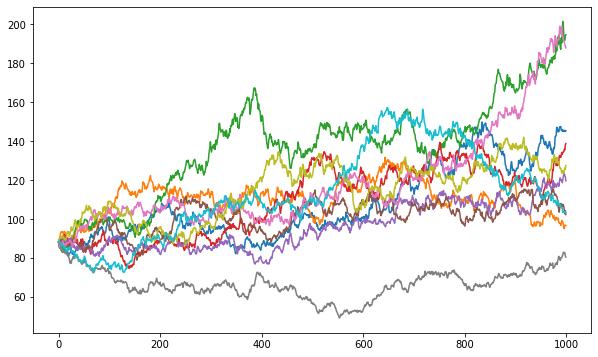

In [31]:
plt.figure(figsize=(10,6))
plt.plot(price_list);